<a href="https://colab.research.google.com/github/vatsalmehta163/codsoft1/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Dataset

In [14]:
import pandas as pd

In [15]:
df_train = pd.read_csv("/content/fraudTrain.csv")
df_test = pd.read_csv("/content/fraudTest.csv")

In [16]:
print(df_train.shape[0])
print(df_test.shape[0])

1296675
555719


Concatinate the different files

In [17]:
df = pd.concat([df_train, df_test])
df.shape[0]

1852394

In [18]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Preprocessing the data

In [19]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [24]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

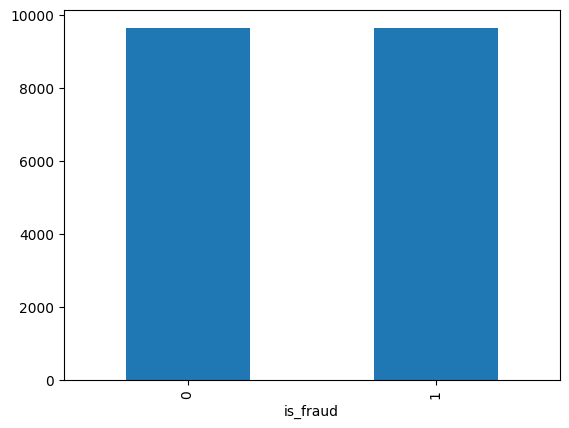

In [25]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [26]:
df_new.isna().sum().sum()

0

In [27]:
df_new.duplicated().sum()

0

In [28]:
df_new.drop_duplicates()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620109,620109,2019-09-21 04:17:25,377895991033232,fraud_Padberg-Rogahn,entertainment,100.12,Kimberly,Myers,F,6881 King Isle Suite 228,...,41.4682,-72.5751,5438,"Librarian, academic",1964-11-17,19cef8ef670d99e354bd62f169ffaa5e,1348201045,41.440364,-71.668989,0
302558,302558,2020-10-13 09:59:05,4173950183554608,"fraud_Schultz, Simonis and Little",grocery_pos,78.01,Stephen,Marshall,M,47144 Roberts Keys,...,40.3330,-73.9809,3279,Health promotion specialist,1978-10-05,d352da47c0657f9605c0b4d4d0961a0e,1381658345,39.589883,-74.711741,0
914821,914821,2019-12-29 20:45:43,4518350514020532,fraud_Johnston-Casper,travel,9.45,Christopher,Gregory,M,9579 Porter Tunnel,...,27.5517,-81.8074,14742,Teaching laboratory technician,1993-02-26,2959b3a3bdc190037018f2fe90e868cc,1356813943,26.783829,-81.358316,0
372489,372489,2019-06-21 18:19:02,4610064888664703,"fraud_Ferry, Lynch and Kautzer",misc_net,133.41,Tammy,Maldonado,F,3312 Rachel Parks Suite 474,...,43.2229,-75.2899,847,Systems analyst,1996-01-11,4ae36b1e2d860147056ac27ec19e7519,1340302742,44.186791,-75.139012,0


Drop the unnecessary coloumns

In [29]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_new.drop(columns=useless_cols, inplace=True)

transform the categorical data

In [34]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,4,281.06,165,27,35.9946,-81.7266,885,801,1
2472,2,11.52,733,43,29.4400,-98.4590,1595797,284,1
2523,4,276.31,733,43,29.4400,-98.4590,1595797,284,1
2546,2,7.03,165,27,35.9946,-81.7266,885,801,1
2553,4,275.73,733,43,29.4400,-98.4590,1595797,284,1
...,...,...,...,...,...,...,...,...,...
620109,0,100.12,348,6,41.4682,-72.5751,5438,366,0
302558,4,78.01,525,31,40.3330,-73.9809,3279,626,0
914821,13,9.45,854,9,27.5517,-81.8074,14742,869,0
372489,8,133.41,789,34,43.2229,-75.2899,847,916,0


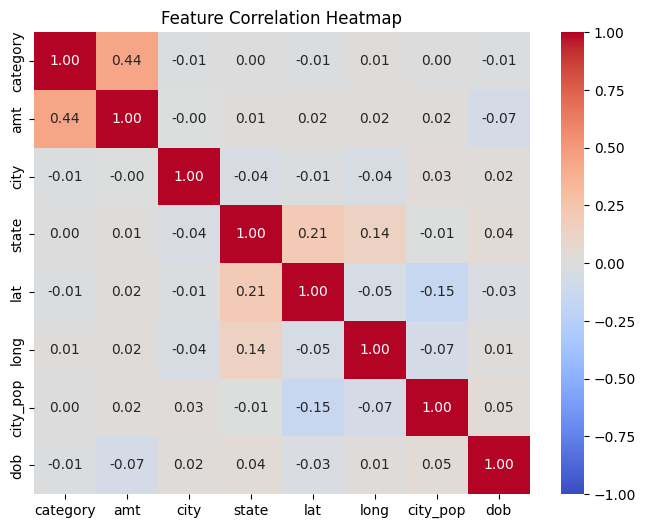

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

X = df_new.drop(columns='is_fraud')
corr = X.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


Standardisation

In [36]:
X = df_new.drop(columns='is_fraud')
y = df_new['is_fraud']

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
df_new_scaled = pd.concat([X_scaled, y], axis=1)

print(df_new_scaled)

        category       amt      city     state       lat      long  city_pop  \
2449   -0.709574 -0.048824 -1.077481  0.034310 -0.510595  0.611576 -0.291727   
2472   -1.225613 -0.766329  1.084657  1.152756 -1.789179 -0.575843  4.991972   
2523   -0.709574 -0.061468  1.084657  1.152756 -1.789179 -0.575843  4.991972   
2546   -1.225613 -0.778281 -1.077481  0.034310 -0.510595  0.611576 -0.291727   
2553   -0.709574 -0.063012  1.084657  1.152756 -1.789179 -0.575843  4.991972   
...          ...       ...       ...       ...       ...       ...       ...   
620109 -1.741653 -0.530479 -0.380876 -1.433649  0.557122  1.261015 -0.276643   
302558 -0.709574 -0.589335  0.292889  0.313922  0.335682  1.161252 -0.283796   
914821  1.612603 -0.771839  1.545254 -1.223940 -2.157524  0.605842 -0.245821   
372489  0.322505 -0.441862  1.297826  0.523630  0.899406  1.068358 -0.291853   
357407  0.064485 -0.664615 -0.308551 -0.734621 -0.090441 -0.588745 -0.293946   

             dob  is_fraud  
2449    0.

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30)

Build the models

Svm

In [41]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[2744  127]
 [ 691 2229]]
0.8587463305128648
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2871
           1       0.95      0.76      0.84      2920

    accuracy                           0.86      5791
   macro avg       0.87      0.86      0.86      5791
weighted avg       0.87      0.86      0.86      5791



Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2760  111]
 [ 218 2702]]
0.9431877050595752
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2871
           1       0.96      0.93      0.94      2920

    accuracy                           0.94      5791
   macro avg       0.94      0.94      0.94      5791
weighted avg       0.94      0.94      0.94      5791



Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[2731  140]
 [ 154 2766]]
0.9492315662234502
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2871
           1       0.95      0.95      0.95      2920

    accuracy                           0.95      5791
   macro avg       0.95      0.95      0.95      5791
weighted avg       0.95      0.95      0.95      5791



Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(learning_rate=0.1)
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2720  151]
 [ 175 2745]]
0.9437057503021931
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2871
           1       0.95      0.94      0.94      2920

    accuracy                           0.94      5791
   macro avg       0.94      0.94      0.94      5791
weighted avg       0.94      0.94      0.94      5791



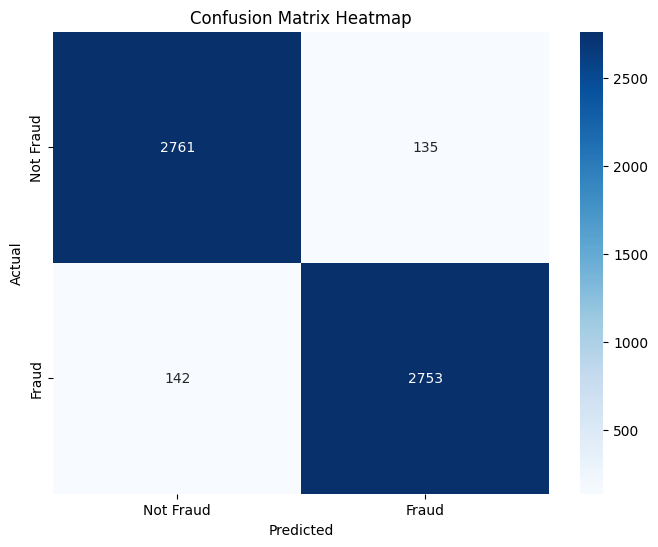

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


X = df_new.drop(columns='is_fraud')
y = df_new['is_fraud']

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()